# Experiment: Draw a world map based on the Aquastat dataset

The problem when drawing a world map using the country names of Aquastat is that some of the names are incompatible with what geopandas expects. This is solved by creating a mapping between the names of Aquastat and the names of geopandas. This notebook is used to create this mapping.

In [1]:
from tueplots import bundles
import geopandas as gpd
import math
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 200})

import sys
import os
sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

from src.utils import to_dat_path

Import the data from Aquastat and get the countries

In [2]:
from src.aquastat_utils import get_aquastat, rename_aquastat_country

# Get the countries from the Aquastat dataset
df = get_aquastat()
countries = df['Country'].unique()
countries

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/Sync/Dokumente/SCHULE/Master/UT/Vorlesungen/Sem2/Data_Literacy/Paper/src/../dat/fao_aquastat.csv already exists.
Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/Sync/Dokumente/SCHULE/Master/UT/Vorlesungen/Sem2/Data_Literacy/Paper/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Republic of the Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Ivory Coast', 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
    

Get the countries from the geopandas dataset

In [3]:
# Get the countries from the geopandas dataset
world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [4]:
geopandas_countries = sorted(list(world['SOVEREIGNT'].unique()))
geopandas_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jo

Let's create a set of the countries that are not in the geopandas dataset

In [5]:
set(countries) - set(geopandas_countries)

{'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Cabo Verde',
 'Comoros',
 'Cook Islands',
 'Dominica',
 'Eswatini',
 'Faroe Islands',
 'Grenada',
 'Kiribati',
 'Liechtenstein',
 'Maldives',
 'Malta',
 'Marshall Islands',
 'Mauritius',
 'Micronesia',
 'Monaco',
 'Nauru',
 'Niue',
 'Palau',
 'Puerto Rico',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Serbia',
 'Seychelles',
 'Singapore',
 'State of Palestine',
 'Tokelau',
 'Tonga',
 'Tuvalu',
 'Vatican City'}

<Figure size 2000x8000 with 0 Axes>

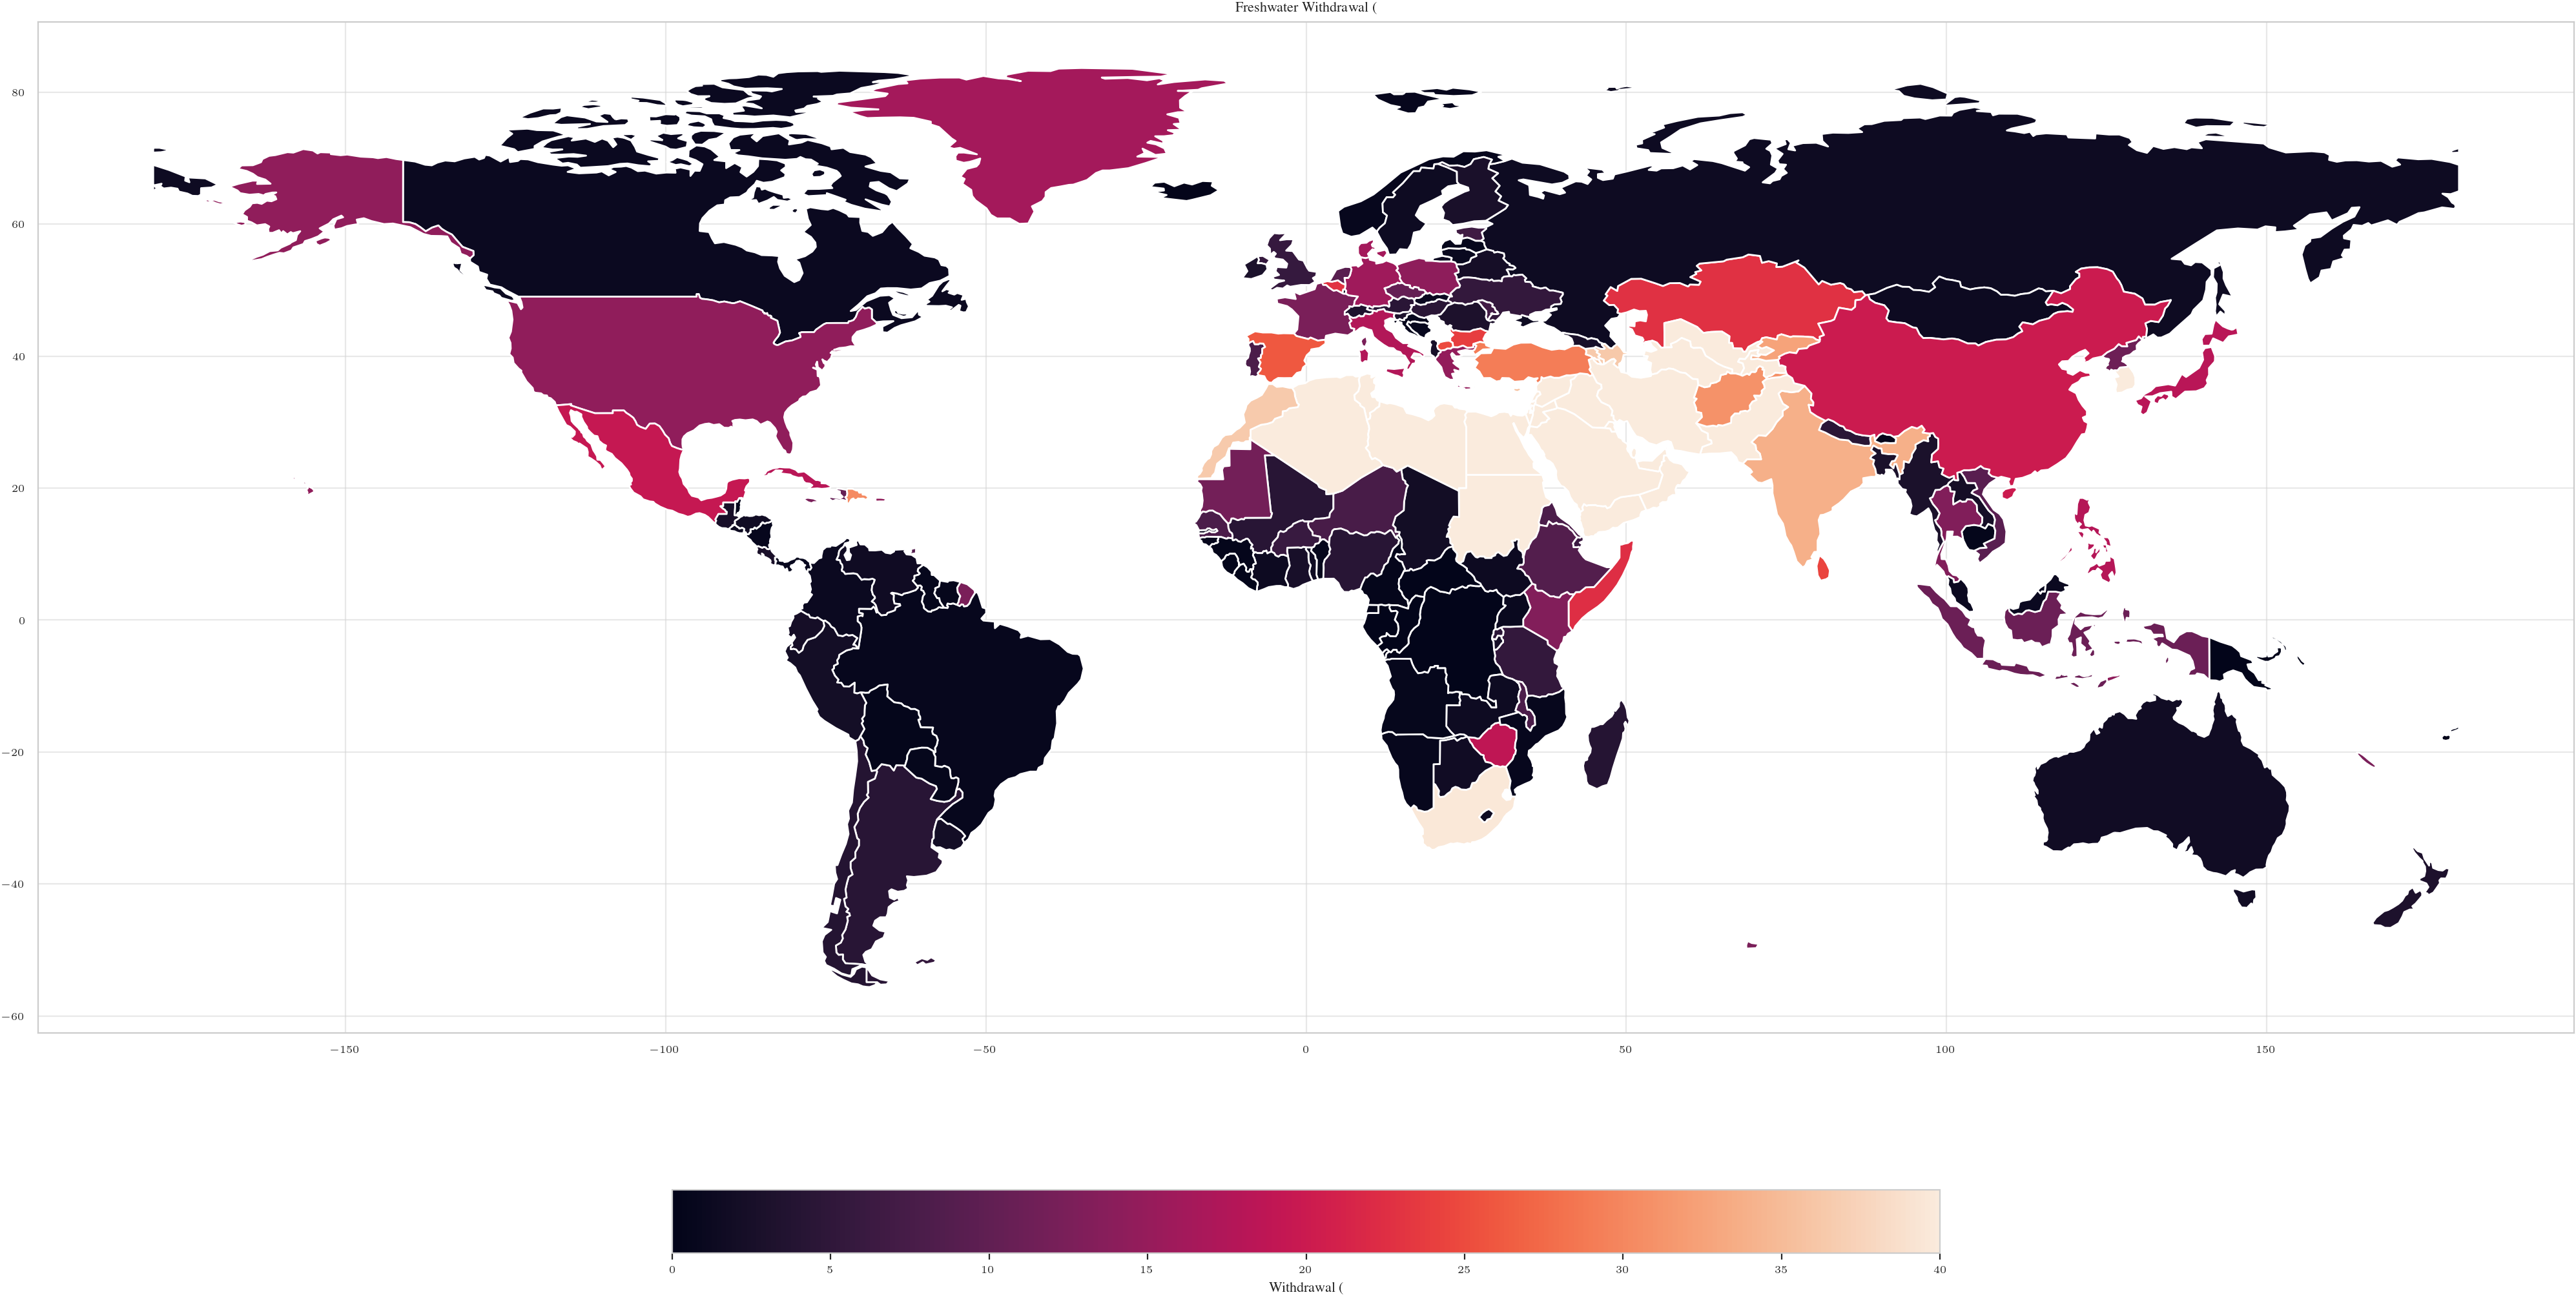

In [6]:
'''Plot a map vizualizing the Freshwater withdrawal (%)'''

year = 2020
variables = ["MDG 7.5. Freshwater withdrawal as % of total renewable water resources"]

'''Extract relevant variables and drop all NaN'''
data = df[['Country', 'Year', *variables]]
data = data.dropna()

'''Create dataframe for map'''
countries_df = data[data['Year'] == year]

countries_df = countries_df[['Country', *variables]]

'''Rename some countries'''
for country in countries_df['Country'].unique():
    replace_to = rename_aquastat_country(country)
    countries_df.replace(to_replace={country: replace_to}, inplace=True)

'''Create map'''
plt.figure(figsize=(10, math.ceil(math.log(countries_df['Country'].nunique(), 2)) * 5))

'''Plot using geopandas'''
world = gpd.read_file(to_dat_path(file_path='naturalearth/ne_110m_admin_0_countries.shx'), engine="pyogrio")
world = world.merge(countries_df, left_on='SOVEREIGNT', right_on='Country')
world.plot(column=variables[0], vmin=0, vmax=40, legend=True, figsize=(20, 20),
           legend_kwds={'label': "Withdrawal (%) of total renewable water resources", 'orientation': "horizontal",
                        'shrink': 0.5})

plt.title('Freshwater Withdrawal (%)')

plt.axis('on')
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey', alpha=0.5)

plt.show()

In [7]:
from src.aquastat_utils import plot_world

year = 2020
variables = ["MDG 7.5. Freshwater withdrawal as % of total renewable water resources"]
world_plot = plot_world(df, variables, year=2020, title='Freshwater Withdrawal (%)')
world_plot.show()

TypeError: unhashable type: 'list'